In [1]:
#common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#statistics libraries
from scipy import stats

#not show warnings (clean code)
import warnings
warnings.filterwarnings('ignore')

#visualisation settings
plt.style.use(['science', 'no-latex'])

sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams.update({
    "font.family": "serif",  
    "font.serif": 'Palatino',  
    "font.size":9,
    "axes.labelsize":9,
    "xtick.labelsize" : 9,
    "ytick.labelsize" : 9})    

colors_pca = ['#9354C8',
'#AB6FDD',
'#CA6FDD',
'#7A3D88',
              
'#53CED8',
'#6EC0E4',
'#4D91B0',
'#32B1EC',
              
'#ECCC32',
'#E1CC69',
'#DFD294',
'#DEED25',
              
'#ED253F',
'#CD6D7A',
'#F9D0D6',
'#D81431',
              
'#3F982D'
]

#dict_normal_names_rus = {#0: 'Нет данных',
#    'no': 'Контроль',
#    'atenolol': 'ATL',
#    'ciprofloxacin':'CPR', 
#    'clotrimazole':'CLO', 
#    'ketoprofen':'KETO'}


# Dataset

In [2]:
df = pd.read_csv('exp_2_aggregated.csv') #read

#then clean and add necessary columns

df['vis_code'] = df['schifre'].str.replace('atenolol','ATL').str.replace('ciprofloxacin','CPR').str.replace('clotrimazole','CLO').str.replace('ketoprofen','KETO')
df['phytomass'] = df['roots'] + df['sprouts']

#first three rows
df.head(3)

,schifre,additive,dosage,phosphotase,betaglucosaminidase,urease,roots,sprouts,vis_code,phytomass
0,atenolol 10,atenolol,10,1692.936567,211.861513,97.56,22.9,93.9,ATL 10,116.8
1,atenolol 10,atenolol,10,2424.308824,303.552163,137.25,11.1,65.8,ATL 10,76.9
2,atenolol 10,atenolol,10,2028.849206,271.784660,76.23,15.7,83.4,ATL 10,99.1


## Look at the average values 

In [3]:
df.groupby(['additive', 'dosage']).mean().reset_index() 
#all columns below represent mean values


,additive,dosage,phosphotase,betaglucosaminidase,urease,roots,sprouts,phytomass
0,atenolol,10,2048.698199,262.399445,103.68,16.566667,81.033333,97.600000
1,atenolol,100,2247.352227,234.068132,91.41,20.466667,64.300000,84.766667
2,atenolol,1000,2401.569652,240.718057,88.65,23.966667,66.933333,90.900000
3,atenolol,10000,2396.475796,265.995115,97.17,23.900000,67.900000,91.800000
4,ciprofloxacin,10,2047.755548,261.625578,92.04,14.766667,82.333333,97.100000
5,ciprofloxacin,100,2147.966931,295.551331,98.52,13.433333,61.533333,74.966667
6,ciprofloxacin,1000,2095.165561,278.541317,85.74,16.966667,56.100000,73.066667
7,ciprofloxacin,10000,2079.460103,281.003876,98.43,5.133333,60.333333,65.466667
8,clotrimazole,10,1850.802618,285.073856,100.08,27.433333,79.266667,106.700000
9,clotrimazole,100,2045.183240,287.115622,83.01,10.133333,66.466667,76.600000


In [4]:
#additional settings: colors
cypro_color = '#88ccee'
atl_color = '#9e2a90'
keto_color = '#ca7878'
clo_color = '#dbd73e'
contrl_color = '#117733'


colors_atl = [atl_color, atl_color, atl_color, atl_color, contrl_color]
colors_cypro = [cypro_color,cypro_color,cypro_color,cypro_color, contrl_color]
colors_keto = [keto_color,keto_color,keto_color,keto_color, contrl_color]
colors_clo = [clo_color,clo_color,clo_color,clo_color, contrl_color]

#additional settings: dataframes

data_atl = df[df['additive'].isin(['atenolol', 'no'])]
data_cipro = df[df['additive'].isin(['ciprofloxacin', 'no'])]
data_keto = df[df['additive'].isin(['ketoprofen', 'no'])]
data_clo = df[df['additive'].isin(['clotrimazole', 'no'])]

In [5]:
#function to plot image

def get_plots(feature, #just put the target feature name in quotes, e.g., 'phytomass'
              safe_fig=False, # change this option if you are satisfied with image on True
              output_name='', #give your own output name for image file
              ylim_max = 3000, #change this option depending on the maximum values of target feature
              title=''): #give your own output name for the title of the image
    plt.figure(figsize=(10,3))
 
    fig, axes = plt.subplots(2,2, figsize=(10,7))

    axes = axes.flatten() #misha_grol help
    datasets = [data_atl, data_cipro, data_clo, data_keto]
    colors_list = [colors_atl, colors_cypro, colors_clo, colors_keto]

    for i,dataset in enumerate(datasets):

        sns.barplot(x = 'vis_code', y = feature,
                    palette=colors_list[i], 
                    data=dataset, 
                    estimator=np.mean, 
                    ci=95, capsize=.1, 
                    #width=0.6, 
                        ax=axes[i])    

        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].set_ylim(0, ylim_max)
        axes[i].xaxis.set_tick_params(rotation=25)
        if safe_fig == True:
            plt.savefig(output_name +'.png', dpi = 300)
        fig.suptitle(title)
        #plt.show()

<Figure size 1000x300 with 0 Axes>

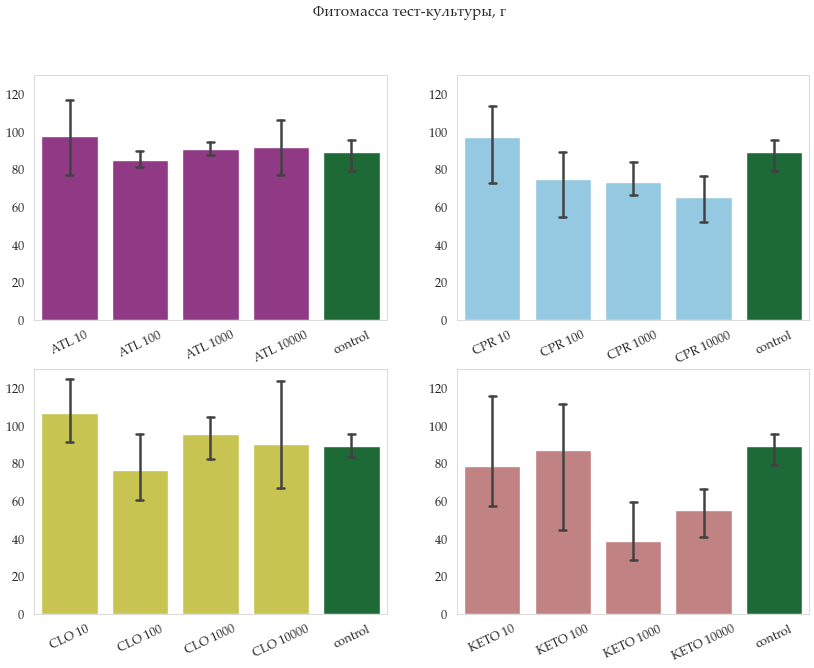

In [6]:
#plotting using function above
get_plots(feature = 'phytomass', 
          output_name='sprouts', 
          safe_fig=False, 
          ylim_max=130, 
          title = 'Фитомасса тест-культуры, г')

# Kruskal Wallis

In [15]:
dose_list = [10, 100, 1000, 10000]
data_stat = data_clo # replace to data_atl, data_keto, data_clo, data_cipro

for dose in dose_list:
    for column in data_stat[data_stat['dosage']==dose].loc[:, ['phosphotase','betaglucosaminidase',
                                                           'urease',
                                                           'roots',
                                                           'sprouts', 'phytomass']].columns:
        if stats.kruskal(data_stat[data_stat['dosage']==dose][column], data_stat[data_stat['dosage']==0][column])[1]<0.05:
            print('At dose equal to', dose, 'there is significant difference with control for mean', column)
        else: print()









At dose equal to 100 there is significant difference with control for mean urease





At dose equal to 1000 there is significant difference with control for mean urease











# Correlation

<AxesSubplot: >

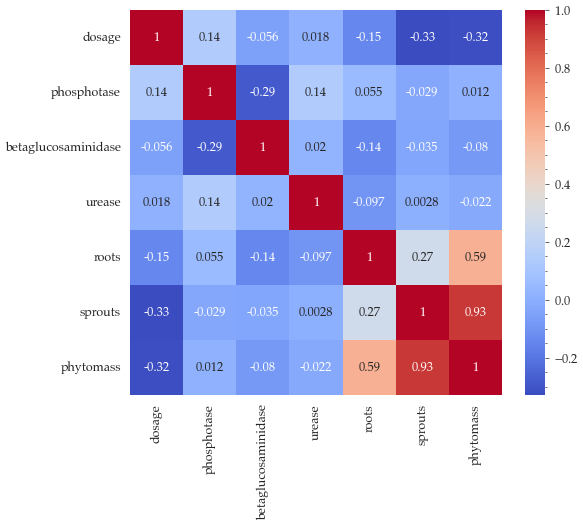

In [7]:
corr = df.loc[:, ~df.columns.isin(['schifre', 'additive', 'vis_code'])].corr('spearman')
plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap='coolwarm', annot=True)
#plt.savefig('correlation' +'.png', dpi = 300)

# PCA

In [8]:
#preparing dataset with numerical variables
for_pca = df.loc[:, ~df.columns.isin(['schifre', 'additive', 'vis_code'])]
X = for_pca # data
Y = df['vis_code'] #labels

scaler = StandardScaler() #data normalisation (required for PCA that all variables are within the same ranges)
X = scaler.fit_transform(X) #fitting the data to scaler

In [9]:

#GETTING 2 first Principle components
PCA = PCA(n_components=2) #can be changed to any number below the number of features, but the following code must be supplied with additional columns
components = PCA.fit_transform(X)
#show components
PCA.components_

array([[ 0.2049038 ,  0.00438743,  0.11439886,  0.0569539 , -0.43020377,
        -0.57863643, -0.64943741],
       [ 0.17707944,  0.7143576 , -0.62745286,  0.11946867,  0.17788327,
        -0.13060382, -0.04082175]])

In [10]:
#explained variance calculation
cumVar = pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2"}) #, 2: "PC3"

,VarPerc,cumVarPerc
PC1,32.650576,32.650576
PC2,18.706075,51.356651


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

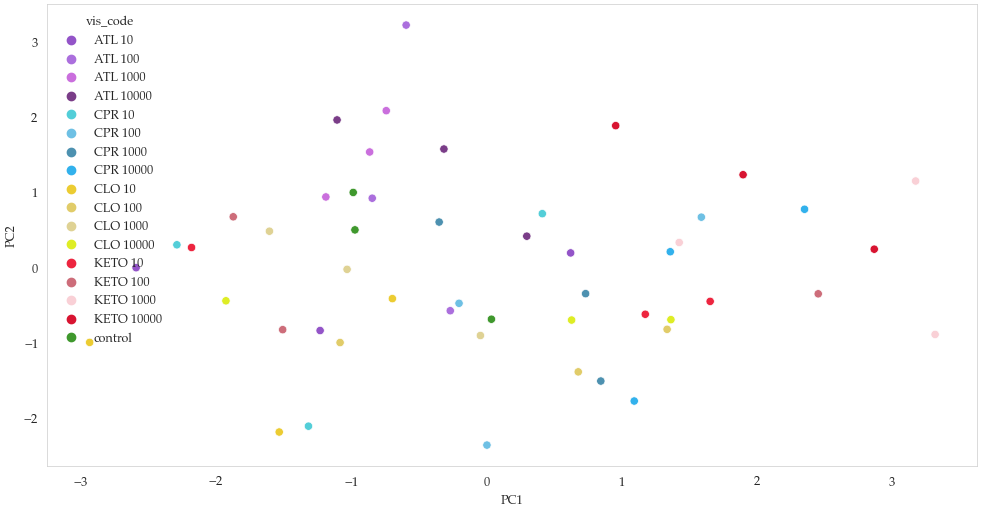

In [11]:
componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2']) #, 'PC3'
pcaDf = pd.concat([componentsDf, Y], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="vis_code", palette=colors_pca)

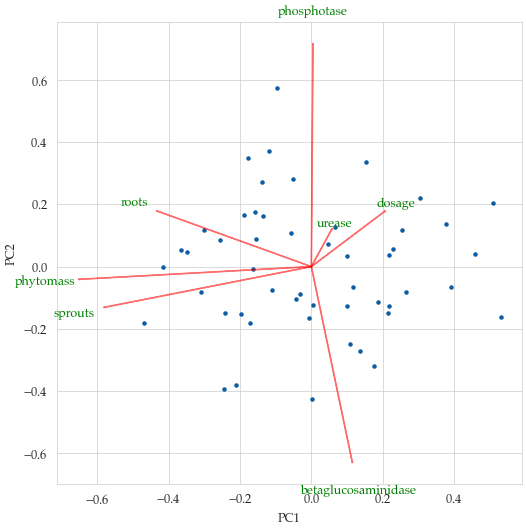

In [12]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
plt.figure(figsize=(6, 6))
biplot(components, np.transpose(PCA.components_), list(for_pca.columns))